In [2]:
import pandas as pd
import numpy as np
import re
from re import findall
import matplotlib.pyplot as plt
from datetime import datetime, date
import plotly.express as px
import seaborn as sns

In [3]:
#!pip install plotly.express

In [4]:
demog = pd.read_excel('/Users/symphony/Downloads/demographics.xlsx')
students2021 = pd.read_excel("/Users/symphony/Downloads/ratings2021.xlsx")

In [5]:
len(students2021)

592

In [6]:
#concatenate the two dataframes, mapping names to names 
df = pd.merge(students2021, demog, on="Compound name", how = 'left')
#make sure the dataframes merged correctly
df.head()

,Campus_x,Department_x,Course Title_x,Employee Number,Compound name,TW2 - rating,TW2 check in notes,TW8 rating,TW8 notes,TW11 rating,...,Gender,Dob,Ethnicity (Student personal characteristics),Nationality,Household income (Student personal characteristics),Disability declared (Student personal characteristics),Campus_y,Job Title,Course Title_y,Department_y
0,Cambridge,BL,BSc (Hons) Business with Events Management,1803103,Aaliah Loureiro Brito,4,NaN,4,NaN,4,...,Female,19/05/2000,Mixed - White & Black African,Portuguese,Low,NaN,Cambridge,School of Management at Anglia Ruskin University,BSc (Hons) Business with Events Management,BL
1,Chelmsford,BL,BSc (Hons) Accounting and Finance,2014825,Aaron Glover,3,NaN,4,NaN,4,...,Male,15/07/2000,White,UK National,NaN,NaN,Cambridge,School of Computing and Information Sciences a...,BEng (Hons) Computer Science,SE
2,Chelmsford,BL,BSc (Hons) Accounting and Finance,2014825,Aaron Glover,3,NaN,4,NaN,4,...,Male,02/09/2001,White,UK National,NaN,NaN,Chelmsford,School of Economics Finance and Law at Anglia ...,BSc (Hons) Accounting and Finance,BL
3,Chelmsford,BL,BSc (Hons) Business Management and Leadership,1841622,Aayush Sanjhawa Prajapati,4,NaN,4,NaN,4,...,Male,13/01/2001,Other Asian background,Nepalese,NaN,NaN,Chelmsford,School of Management at Anglia Ruskin University,BSc (Hons) Business Management and Leadership,BL
4,Cambridge,AHSS,BA (Hons) Performing Arts,1909589,Abbie Kermode,1,NaN,1,NaN,1,...,Female,10/01/2001,White,UK National,Mid,NaN,Cambridge,Cambridge School of the Creative Industries at...,BA (Hons) Performing Arts,AHSS


In [7]:
#clean data
#df = df.set_index('Employee Number')

#drop columns
clean_df = df.drop(['TW2 check in notes', 'TW8 notes','Campus_y', 'Unnamed: 10', 'Department_y', 
                    'Course Title_y'], axis = 1)
clean_df

,Campus_x,Department_x,Course Title_x,Employee Number,Compound name,TW2 - rating,TW8 rating,TW11 rating,Overall rating,Gender,Dob,Ethnicity (Student personal characteristics),Nationality,Household income (Student personal characteristics),Disability declared (Student personal characteristics),Job Title
0,Cambridge,BL,BSc (Hons) Business with Events Management,1803103,Aaliah Loureiro Brito,4,4,4,4,Female,19/05/2000,Mixed - White & Black African,Portuguese,Low,NaN,School of Management at Anglia Ruskin University
1,Chelmsford,BL,BSc (Hons) Accounting and Finance,2014825,Aaron Glover,3,4,4,4,Male,15/07/2000,White,UK National,NaN,NaN,School of Computing and Information Sciences a...
2,Chelmsford,BL,BSc (Hons) Accounting and Finance,2014825,Aaron Glover,3,4,4,4,Male,02/09/2001,White,UK National,NaN,NaN,School of Economics Finance and Law at Anglia ...
3,Chelmsford,BL,BSc (Hons) Business Management and Leadership,1841622,Aayush Sanjhawa Prajapati,4,4,4,4,Male,13/01/2001,Other Asian background,Nepalese,NaN,NaN,School of Management at Anglia Ruskin University
4,Cambridge,AHSS,BA (Hons) Performing Arts,1909589,Abbie Kermode,1,1,1,1,Female,10/01/2001,White,UK National,Mid,NaN,Cambridge School of the Creative Industries at...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Chelmsford,HEMS,BA (Hons) Primary Education Studies,1912820,Zahra Regan,1,4,2,3,Female,02/08/2000,White,UK National,NaN,NaN,School of Education and Social Care at Anglia ...
591,Cambridge,AHSS,BA (Hons) Sociology,2012425,Zainab Akhtar,4,4,4,4,Female,28/11/2000,Asian or Asian British - Bangladeshi,UK National,NaN,NaN,School of Humanities and Social Sciences at An...
592,Cambridge,HEMS,BSc (Hons) Midwifery,1900378,Zoe Evans,1,1,1,1,Female,24/06/1995,White,UK National,Low,NaN,School of Nursing and Midwifery - Cambridgeshi...
593,Chelmsford,HEMS,BSc (Hons) Paramedic Science,1900944,Zona Harold,1,2,2,2,Female,07/11/1998,White,UK National,Mid,NaN,School of Allied Health at Anglia Ruskin Unive...


In [8]:
#rename columns
clean_df = clean_df.rename(columns={clean_df.columns[0]:'campus', clean_df.columns[1]:'department', 
                                    clean_df.columns[2]:'course', clean_df.columns[3]:'id', 
                                    clean_df.columns[4]:'name', clean_df.columns[5]:'tw2', clean_df.columns[6]:'tw8', 
                                    clean_df.columns[7]:'tw11', clean_df.columns[8]:'overall', clean_df.columns[9]:'gender', 
                                    clean_df.columns[10]:'dob', clean_df.columns[11]:'ethnicity', clean_df.columns[12]:'nationality', clean_df.columns[13]:'household_income', clean_df.columns[14]:'disab', clean_df.columns[15]:'school'})

In [9]:
duplicateRows = clean_df[clean_df.duplicated(['name'])]
clean_df = clean_df.drop(500)

In [10]:
clean_df = clean_df.drop(345)

In [11]:
clean_df = clean_df.drop(2)

In [12]:
clean_df.head()

,campus,department,course,id,name,tw2,tw8,tw11,overall,gender,dob,ethnicity,nationality,household_income,disab,school
0,Cambridge,BL,BSc (Hons) Business with Events Management,1803103,Aaliah Loureiro Brito,4,4,4,4,Female,19/05/2000,Mixed - White & Black African,Portuguese,Low,NaN,School of Management at Anglia Ruskin University
1,Chelmsford,BL,BSc (Hons) Accounting and Finance,2014825,Aaron Glover,3,4,4,4,Male,15/07/2000,White,UK National,NaN,NaN,School of Computing and Information Sciences a...
3,Chelmsford,BL,BSc (Hons) Business Management and Leadership,1841622,Aayush Sanjhawa Prajapati,4,4,4,4,Male,13/01/2001,Other Asian background,Nepalese,NaN,NaN,School of Management at Anglia Ruskin University
4,Cambridge,AHSS,BA (Hons) Performing Arts,1909589,Abbie Kermode,1,1,1,1,Female,10/01/2001,White,UK National,Mid,NaN,Cambridge School of the Creative Industries at...
5,Peterborough,HEMS,BA (Hons) Primary Education Studies,2010362,Abby Paxton,1,2,1,2,Female,27/11/2000,White,UK National,Low,Yes,School of Education and Social Care at Anglia ...


In [13]:
#import chat data
chat = pd.read_excel('/Users/symphony/Downloads/wb_calls.xlsx')
#clean chat dataframe
#rename columns
chat_df = chat.rename(columns={chat.columns[0]:'name', chat.columns[1]:'gender', 
                                    chat.columns[2]:'campus', chat.columns[-1]: 'action'})
chat_df = chat_df.drop_duplicates(subset='name')
chat_df

,name,gender,campus,action
0,Adam Williams,Male,Cambridge,06/12/2021 01:06 PM Elly Page: \nTW11 chat spa...
1,Aliyah Jawad,Female,Cambridge,06/12/2021 01:38 PM Elly Page: \nTW11 chat spa...
2,Jack Beedle,Male,Cambridge,07/12/2021 12:44 PM Elly Page: \nTW11 chat spa...
3,Harper Harper,Female,Cambridge,07/12/2021 11:47 AM Elly Page: \nTW11 chat spa...
4,Esme Powell,Female,Cambridge,07/12/2021 11:19 AM Elly Page: \nTW11 chat spa...
...,...,...,...,...
685,Emmanuel Udekwe,Male,Cambridge,05/10/2021 02:33 PM Nicki Sinclair: \nOpened i...
686,Megan Rees,Female,Cambridge,07/12/2021 12:00 PM Nicki Sinclair: \nTW12 cha...
687,Steliana Guta,Female,Cambridge,06/12/2021 02:52 PM Nicki Sinclair: \nTW12 cha...
688,Vipin Kumar .,Male,Cambridge,06/12/2021 02:07 PM Nicki Sinclair: \nTW12 cha...


In [14]:
#new complete dataframe with all available data for each WB
df1 = pd.merge(clean_df, chat_df, on ='name')
#drop redundant columns & rename columns
df1 = df1.drop(['gender_y', 'campus_y'], axis = 1)
df1 = df1.rename(columns={df1.columns[0]:'campus', df1.columns[9]:'gender'})
df1.head()

,campus,department,course,id,name,tw2,tw8,tw11,overall,gender,dob,ethnicity,nationality,household_income,disab,school,action
0,Cambridge,BL,BSc (Hons) Business with Events Management,1803103,Aaliah Loureiro Brito,4,4,4,4,Female,19/05/2000,Mixed - White & Black African,Portuguese,Low,NaN,School of Management at Anglia Ruskin University,06/12/2021 11:43 AM Elly Page: \nTW11 chat spa...
1,Chelmsford,BL,BSc (Hons) Accounting and Finance,2014825,Aaron Glover,3,4,4,4,Male,15/07/2000,White,UK National,NaN,NaN,School of Computing and Information Sciences a...,02/09/2021 12:31 PM Nicki Sinclair: \nThis see...
2,Chelmsford,BL,BSc (Hons) Business Management and Leadership,1841622,Aayush Sanjhawa Prajapati,4,4,4,4,Male,13/01/2001,Other Asian background,Nepalese,NaN,NaN,School of Management at Anglia Ruskin University,06/12/2021 11:45 AM Elly Page: \nTW11 Chat spa...
3,Cambridge,AHSS,BA (Hons) Performing Arts,1909589,Abbie Kermode,1,1,1,1,Female,10/01/2001,White,UK National,Mid,NaN,Cambridge School of the Creative Industries at...,06/12/2021 11:46 AM Elly Page: \nTW11 chat spa...
4,Peterborough,HEMS,BA (Hons) Primary Education Studies,2010362,Abby Paxton,1,2,1,2,Female,27/11/2000,White,UK National,Low,Yes,School of Education and Social Care at Anglia ...,06/12/2021 11:50 AM Elly Page: \nTW11 chat spa...


In [15]:
df1.drop(df1.loc[df1['name']=='Aaron Glover'].index, inplace=True)

In [16]:
df1.index = range(len(df1))

In [17]:
df1 = df1.rename(columns={df1.columns[-1]:'text'})
df1['text'][0]

"06/12/2021 11:43 AM Elly Page: \nTW11 chat space check in. Buddy posted another message but has only checked in twice with little said\nBuddy rating: 4\xa0\n\n06/12/2021 10:37 AM Rachel Wright: \nAs this trimester draws to a close, unfortunately that means that the Welcome Buddy scheme is also ending. So to the Welcome Buddy, thank you for your work this term.\n \nTo everyone in the chat, we hope that the scheme has been valuable in helping you settle in to life at ARU, but however you feel about it, we would love to hear your feedback so that we can continually improve it going forward.\n \nYou can either complete this anonymously or provide your details and be entered into a prize draw to win a £40 Amazon voucher. It should take no more than 10 minutes and you can complete it here. The deadline for completing the survey is midnight on Sunday 12th December and the winner of the Amazon voucher will be notified on their ARU student email on Monday 13th December: https://angliaruskin.on

In [18]:
#text = df1['action'][0]
#name = df1['name'][0]
#findall('{}: \n(.+?)\n'.format(df1['name'][0]), df1['action'][0])

In [19]:
len(df1)

581

In [20]:
len(df1['text'])

581

In [21]:
df1.head()

,campus,department,course,id,name,tw2,tw8,tw11,overall,gender,dob,ethnicity,nationality,household_income,disab,school,text
0,Cambridge,BL,BSc (Hons) Business with Events Management,1803103,Aaliah Loureiro Brito,4,4,4,4,Female,19/05/2000,Mixed - White & Black African,Portuguese,Low,NaN,School of Management at Anglia Ruskin University,06/12/2021 11:43 AM Elly Page: \nTW11 chat spa...
1,Chelmsford,BL,BSc (Hons) Business Management and Leadership,1841622,Aayush Sanjhawa Prajapati,4,4,4,4,Male,13/01/2001,Other Asian background,Nepalese,NaN,NaN,School of Management at Anglia Ruskin University,06/12/2021 11:45 AM Elly Page: \nTW11 Chat spa...
2,Cambridge,AHSS,BA (Hons) Performing Arts,1909589,Abbie Kermode,1,1,1,1,Female,10/01/2001,White,UK National,Mid,NaN,Cambridge School of the Creative Industries at...,06/12/2021 11:46 AM Elly Page: \nTW11 chat spa...
3,Peterborough,HEMS,BA (Hons) Primary Education Studies,2010362,Abby Paxton,1,2,1,2,Female,27/11/2000,White,UK National,Low,Yes,School of Education and Social Care at Anglia ...,06/12/2021 11:50 AM Elly Page: \nTW11 chat spa...
4,Chelmsford,HEMS,BSc (Hons) Nursing (Child),1803962,Abi Mason,2,1,3,2,Female,07/05/1992,White,UK National,Low,Yes,School of Nursing and Midwifery - Chelmsford a...,06/12/2021 12:57 PM Elly Page: \nTW11 chat spa...


In [22]:
#create column for cleaned text
df1["chat"] = " "

In [23]:
n = df1['name'][0]
t = df1['text'][0]
findall('{}: \n(.+?)\n'.format(n), t)

['Hey guys, just wanted to send a last quick little message to remind you that I am still here should you require any assistance! Look forward to hearing back :)',
 'Hey everyone! I’m Aaliah and I’ll be your welcome buddy this year. I’m here to answer any questions that you may have and to help you have a smoother transition so please feel free to speak to me :)']

In [24]:
df1 = df1[df1['text'].notna()]

In [25]:
len(df1)
df1['text'] = df1['text'].astype("string")
text = df1['text']

In [27]:
def extract(name, text):
    found_text = findall('{}: \n(.+?)\n'.format(name), text)
    return found_text

In [32]:
#chat = []
for i in range(len(df1)):
    name = df1['name'][i]
   # print(name) 
    text = df1['text'][i]
   # print(extract(name, text))
    df1.chat[i] = extract(name, text)
    #chat = chat.append(extract(name, text))

<ipython-input-32-3f8f5815945d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.chat[i] = extract(name, text)


In [33]:
#create columns for chat analysis
df1["formality"] = " "
df1["helpfulness"] = " "
df1["warmth"] = " "

In [34]:
#manually input formality, warmth and helpfulness values
df1['chat'][580]

['Yeah let’s make a group chat guys, why don’t you send me your numbers to my uni email: zha100@student.aru.ac.uk',
 'Hey guys! I can’t stay for the bingo, but I can meet you guys after f2f, before you go into bingo? Around 4:15pm on the 25th of October, if that’s good for you?']

In [374]:
df1.loc[581,'formality'] = 1
df1.loc[581,'warmth'] = 3
df1.loc[581,'helpfulness'] = 3


In [375]:
df1['text'][580]

"06/12/2021 01:51 PM Nicki Sinclair: \nTW12 Chat space check-in - buddy hasn't done anything since our last check in but was doing a good job up until that point.\nBuddy Rating: 3\n\n06/12/2021 10:37 AM Rachel Wright: \nAs this trimester draws to a close, unfortunately that means that the Welcome Buddy scheme is also ending. So to the Welcome Buddy, thank you for your work this term.\n \nTo everyone in the chat, we hope that the scheme has been valuable in helping you settle in to life at ARU, but however you feel about it, we would love to hear your feedback so that we can continually improve it going forward.\n \nYou can either complete this anonymously or provide your details and be entered into a prize draw to win a £40 Amazon voucher. It should take no more than 10 minutes and you can complete it here. The deadline for completing the survey is midnight on Sunday 12th December and the winner of the Amazon voucher will be notified on their ARU student email on Monday 13th December: 

In [376]:

chat_analysis_df = df1[['overall', 'formality', 'warmth', 'helpfulness']][500:581].copy()
chat_analysis_df

,overall,formality,warmth,helpfulness
500,2,,,
501,4,,,
502,4,,,
503,3,,,
504,3,,,
...,...,...,...,...
576,3,,,
577,4,,,
578,1,,,
579,2,,,


In [377]:
#df1.to_csv('final_df.csv')

In [378]:
#df1.to_csv('/Users/symphony/Downloads/final_df.csv')

In [379]:
labeled_df = pd.read_csv('/Users/symphony/Downloads/500_df.csv')
len(labeled_df)

581

In [380]:
#is there a relationship between overall and chat metrics?

chat_analysis_df = labeled_df[['overall', 'formality', 'warmth', 'helpfulness']].copy()

#convert al columns to floats, not int
chat_analysis_df.overall = chat_analysis_df.overall.astype(float)
chat_analysis_df['formality'] = pd.to_numeric(chat_analysis_df['formality'],errors='coerce')
chat_analysis_df['helpfulness'] = pd.to_numeric(chat_analysis_df['helpfulness'],errors='coerce')
chat_analysis_df['warmth'] = pd.to_numeric(chat_analysis_df['warmth'],errors='coerce')

In [381]:
#remove nans from overall
chat_analysis_df['overall'].isnull().values.any()
chat_analysis=chat_analysis_df.dropna(axis = 0).reset_index(drop=True)
chat_analysis['overall'].isnull().values.any()

False

In [382]:
#remove nans from formailty/warmth/help
chat_analysis_df['formality'].isnull().values.any()
chat_analysis=chat_analysis_df.dropna(axis = 0).reset_index(drop=True)
chat_analysis['formality'].isnull().values.any()

False

In [383]:
#check for and remove all columns with 0s, and these rows were not analyzaable 
(chat_analysis['formality'] == 0).sum()
chat_analysis= chat_analysis[chat_analysis['formality'] != 0]
(chat_analysis['helpfulness'] == 0).sum()

0

In [384]:
type(chat_analysis['warmth'][0])

numpy.float64

In [385]:
chat_corr = chat_analysis.corr()['overall']
chat_corr
#warmth is highly correlated with a high performance score
#notable negative correlation between warmth and helpfulness and overall score

overall        1.000000
formality      0.062721
warmth        -0.432518
helpfulness   -0.417757
Name: overall, dtype: float64

In [386]:
from scipy.stats import pearsonr
def calculate_pvalues(chat_analysis):
    chat_analysis = chat_analysis.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=chat_analysis.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in chat_analysis.columns:
        for c in chat_analysis.columns:
            pvalues[r][c] = round(pearsonr(chat_analysis[r], chat_analysis[c])[1], 3)
    return pvalues

In [387]:
calculate_pvalues(chat_analysis) 

,overall,formality,warmth,helpfulness
overall,0.0,0.14,0.0,0.0
formality,0.14,0.0,0.0,0.0
warmth,0.0,0.0,0.0,0.0
helpfulness,0.0,0.0,0.0,0.0


In [388]:
len(chat_analysis)

555

## Descriptive Statistics

### WB per campus

In [389]:
#Remove nans from dob column
df1=df1.dropna(subset=['dob'])

In [390]:
#find number of WB from each campus 
df1['campus'].value_counts()
pd.DataFrame(data=df1['campus'].value_counts(), dtype=None, copy=None)
#any observations from Peterborough will be underpowered 

,campus
Cambridge,340
Chelmsford,215
Peterborough,15


In [391]:
len(df1)

570

Text(0, 0.5, 'number of Welcome Buddies')

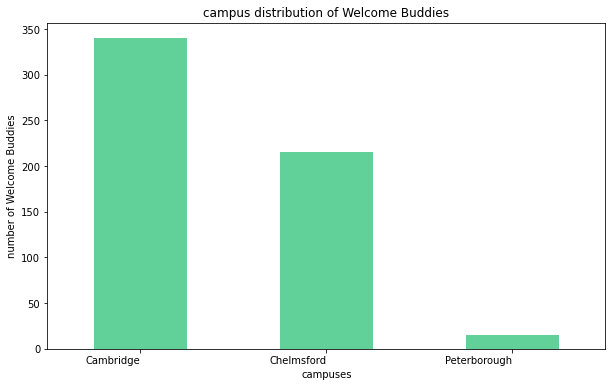

In [392]:
#visualize distribution of WB across three campuses 
df1['campus'].value_counts().plot(kind="bar", figsize=(10,6), color="#61d199")
plt.title('campus distribution of Welcome Buddies')
plt.xlabel('campuses')
plt.xticks(rotation=0, ha='right')
plt.ylabel('number of Welcome Buddies')

### gender distribution of welcome buddies

In [393]:
gender_count = pd.DataFrame(data=df1['gender'].value_counts(), dtype=None, copy=None)
gender_count

,gender
Female,452
Male,118


In [394]:
prop_gender_count = pd.DataFrame(data=df1['gender'].value_counts(normalize=True), dtype=None, copy=None)
prop_gender_count

,gender
Female,0.792982
Male,0.207018


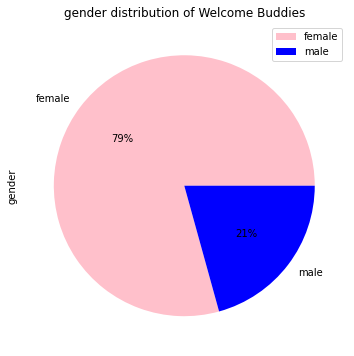

In [395]:
#visualize gender breakdown across campuses
prop_gender_count.plot(kind='pie', y='gender', autopct='%1.0f%%', figsize=(10,6), labels= ['female','male'], colors=["pink", "blue"])
#most responses are positive
plt.title('gender distribution of Welcome Buddies')
plt.show() 

In [396]:
#proportional gender distribution of WB subsetted to campus
gender_table = pd.crosstab(index=df1['campus'], columns=df1['gender'], normalize='index')*100
gender_table

gender,Female,Male
campus,,
Cambridge,77.058824,22.941176
Chelmsford,81.395349,18.604651
Peterborough,100.000000,0.000000


Text(0.5, 0, 'campus')

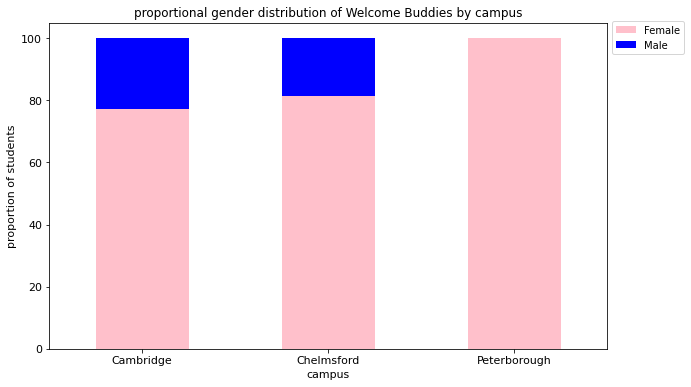

In [397]:
#stacked bar plot showing proportional distribution of genders of WB in each campus
ax = gender_table.plot(kind='bar', stacked=True, figsize=(10,6), rot=0, color = ['pink','blue'])
plt.title('proportional gender distribution of Welcome Buddies by campus', fontsize=12)
ax.legend(title='', bbox_to_anchor=(1, 1.02), loc='upper left', prop={'size': 10})
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
plt.ylabel('proportion of students', fontsize = 11)
plt.xlabel('campus', fontsize = 11)

##### conclusion: overwhelming manority of Welcome Buddies across campuses and within campuses are female

# age

In [398]:
df1['dob'].isnull().values.any()

False

In [399]:
#create age column
def calculate_age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df1['age'] = df1['dob'].apply(calculate_age)

In [400]:
#find age distribution
age_counts = df1["age"].value_counts()

fig = px.bar(age_counts, title="age of Welcome Buddies")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [401]:
len(df1['age'])

570

In [402]:
(df1['age'] <= 25).sum()

436

In [403]:

(df1['age'] >= 26).sum()
#approz 24% od students are over 25, this is sizeable enough to warrant a binary variable of 25 and under or over 25

134

In [404]:
436/570

0.7649122807017544

In [405]:
mean_age = df1["age"].mean()
print('mean age:', mean_age)
median_age = df1["age"].median()
print('median age:', median_age)
mode_age = df1["age"].mode()
print('mode age:', mode_age)

mean age: 24.75964912280702
median age: 21.0
mode age: 0    20
dtype: int64


### conclusion: most WB are 20 years old and the median age is 21

In [406]:
df1['overall'].isnull().values.any()

True

In [407]:
df1 = df1[df1['overall'].notna()]

In [408]:
df1['age'].isnull().values.any()

False

In [409]:
#is there a corr between age and overall?
df1['age'].astype('int').corr(df1['overall'].astype('int'))
#not much corr

-0.05004790359948181

### ethnicity

In [410]:
#find ethnicity distribution
ethn_counts = pd.DataFrame(data = df1["ethnicity"].value_counts(), dtype=None, copy=None)
ethn_counts

,ethnicity
White,375
Black or Black British - African,47
Asian or Asian British - Indian,33
Asian or Asian British - Pakistani,22
Other Asian background,21
Asian or Asian British - Bangladeshi,8
Mixed - White & Black African,8
Not known,8
Other ethnic background,7
Other mixed background,6


In [411]:
ethn_fig = px.bar(ethn_counts, title="ethnic distribution of Welcome Buddies")
ethn_fig.update_layout(
    xaxis_title = "ethnic",
    yaxis_title = "frequency",
    title_x = 0.5, 
    showlegend = False
)
ethn_fig.show()

### nationality

In [412]:
#find nationality distribution
nat_counts = pd.DataFrame(data = df1["nationality"].value_counts(), dtype=None, copy=None)
nat_counts.head()

,nationality
UK National,393
Portuguese,20
Indian,16
Italian,16
Romanian,15


In [413]:
nat_fig = px.bar(nat_counts, title="nationality distribution of Welcome Buddies")
nat_fig.update_layout(
    xaxis_title = "nationality",
    yaxis_title = "frequency",
    title_x = 0.5, 
    showlegend = False
)
nat_fig.show()

### dept

In [414]:
#find dept distribution across WBs
dept_counts = pd.DataFrame(data = df1["department"].value_counts(), dtype=None, copy=None)
dept_counts

,department
HEMS,253
SE,157
AHSS,89
BL,64


In [415]:
dept_fig = px.bar(dept_counts, title="faculty distribution of Welcome Buddies")
dept_fig.update_layout(
    xaxis_title = "department",
    yaxis_title = "frequency",
    title_x = 0.5, 
    showlegend = False
)
dept_fig.show()

### course

In [416]:
#find course distribution across WBs
course_counts = pd.DataFrame(data = df1["course"].value_counts(), dtype=None, copy=None)
course_counts

,course
BSc (Hons) Midwifery,48
BSc (Hons) Nursing (Adult),37
BA (Hons) Primary Education Studies,37
BSc (Hons) Paramedic Science,32
BSc (Hons) Biomedical Science,30
...,...
BSc (Hons) Psychology and Criminology [Extended],1
BSc (Hons) Business with Human Resource Management,1
BA (Hons) Writing and Film,1
BSc (Hons) Zoology [Extended],1


In [417]:
#find courses with 5 or more WB representatives 
not_to_recruit =df1["course"].value_counts().loc[lambda x: x > 4]
nr = pd.DataFrame(data = not_to_recruit)
nr.to_excel("nr.xlsx",
             sheet_name='not_to_recruit')


In [418]:
#find courses with 2 or less WB representatives 
to_recruit =df1["course"].value_counts().loc[lambda x: x <= 4]
tr = pd.DataFrame(data = to_recruit)
tr.to_excel("tr.xlsx",
             sheet_name='to_recruit')


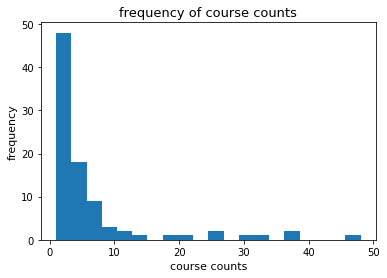

In [419]:
#histogram shows that there are a high number of courses with less than 5 representatives, 
#strong right skew?
plt.hist(course_counts, bins = 20)
plt.title('frequency of course counts',fontsize = 13)
plt.ylabel('frequency', fontsize = 11)
plt.xlabel('course counts', fontsize = 11)
plt.show() 

##### conclusion: most courses have less than 5 Welcome Budy representatives. see to_recruit for which courses these are

In [420]:
course_fig = px.bar(course_counts, title="course distribution of Welcome Buddies")
course_fig.update_layout(
    xaxis_title = "course",
    yaxis_title = "frequency",
    title_x = 0.5, 
    showlegend = False
)
course_fig.show()

#### conclusion: courses which could stand to have more representation: to_recruit

### school

In [421]:
#clean school column
df1['school'] = df1['school'].str.replace('at Anglia Ruskin University', '')
#will not differentiate between Cam and Chelms School of Nursing and Midwifery
df1['school'] = df1['school'].str.replace('- Chelmsford', '')
df1['school'] = df1['school'].str.replace('- Cambridgeshire', '')

In [422]:
#find school distribution across WBs
school_counts = pd.DataFrame(data = df1["school"].value_counts(), dtype=None, copy=None)
school_counts.head()

,school
School of Nursing and Midwifery,125
School of Life Sciences,75
School of Education and Social Care,54
School of Psychology and Sport Science,49
School of Allied Health,48


In [423]:
school_fig = px.bar(school_counts, title="school membership distribution of Welcome Buddies")
school_fig.update_layout(
    xaxis_title = "school",
    yaxis_title = "frequency",
    title_x = 0.5, 
    showlegend = False
)
school_fig.show()

#### conclusion: more students should be recruited from the School of Engineering?

In [424]:
len(df1)

563

## Associations

In [425]:
#find score distribution across WBs
score_counts = pd.DataFrame(data = df1["overall"].value_counts(), dtype=None, copy=None)
score_counts.head()

,overall
3,235
2,162
4,107
1,52
5,7


In [426]:
score_fig = px.bar(score_counts, title="distribution of overall performance scores of Welcome Buddies")
score_fig.update_layout(
    xaxis_title = "score",
    yaxis_title = "frequency",
    title_x = 0.5, 
    showlegend = False
)
score_fig.show()

In [427]:
#impute 'overall' nans with mean of tw8 and tw11

#look at overall nans
nan_overall = df1[df1['overall'].isna()]

#all nans are missing tw2

#impute overall with mean of tw8 and tw11
df1['overall'] = df1['overall'].fillna((df1['overall'].mean()))
#check for nan in overall
df1.isnull().sum(axis = 0)


campus                0
department            0
course                0
id                    0
name                  0
tw2                   0
tw8                   0
tw11                  0
overall               0
gender                0
dob                   0
ethnicity             0
nationality           1
household_income    302
disab               474
school                0
text                  0
chat                  0
formality             0
helpfulness           0
warmth                0
age                   0
dtype: int64

In [428]:
len(df1)

563

### correlation between campus and overall score

In [429]:
campus_df = df1[['campus', 'overall']].copy()
campus_df = pd.get_dummies(campus_df, columns=["campus"])
campus_df.head()

corr_tab = campus_df.corr()['overall']
corr_tab

overall                1.000000
campus_Cambridge       0.043725
campus_Chelmsford     -0.015596
campus_Peterborough   -0.086369
Name: overall, dtype: float64

#### conclusion: negligable correlation between overall score and campus

###  correlation between department and overall score

In [430]:
dept_df = df1[['department', 'overall']].copy()
dept_df = pd.get_dummies(dept_df, columns=["department"])
dept_df.head()

dept_corr_tab = dept_df.corr()['overall']
dept_corr_tab

overall            1.000000
department_AHSS   -0.053838
department_BL      0.039805
department_HEMS   -0.054224
department_SE      0.075771
Name: overall, dtype: float64

#### conclusion: negligable correlation between overall score and dept

### correlation between course and overall score

In [431]:
course_df = df1[['course', 'overall']].copy()
course_df = pd.get_dummies(course_df, columns=["course"])
course_df.head()

course_corr_tab = course_df.corr()['overall']
course_corr_tab

overall                                       1.000000
course_BA (Hons) Architecture                -0.006086
course_BA (Hons) Computer Games Art          -0.056230
course_BA (Hons) Criminology                 -0.015884
course_BA (Hons) Criminology and Policing    -0.048640
                                                ...   
course_BSc (Hons) Zoology                    -0.021055
course_BSc (Hons) Zoology [Extended]         -0.034363
course_LLB (Hons) Law                        -0.026189
course_MBChB Primary Medical Qualification   -0.021392
course_MEng Automotive Engineering            0.011920
Name: overall, Length: 91, dtype: float64

In [432]:
len(df1)

563

### gender

In [433]:
#encode gender as binary
gender = pd.get_dummies(df1["gender"])

In [434]:
df1 = pd.concat((df1, gender), axis=1)

In [435]:
df1 = df1.drop(["Male"], axis=1)

In [436]:
df1 = df1.rename(columns={"Female": "gender_encoded"})
df1.head()

,campus,department,course,id,name,tw2,tw8,tw11,overall,gender,...,household_income,disab,school,text,chat,formality,helpfulness,warmth,age,gender_encoded
0,Cambridge,BL,BSc (Hons) Business with Events Management,1803103.0,Aaliah Loureiro Brito,4,4,4,4,Female,...,Low,NaN,School of Management,06/12/2021 11:43 AM Elly Page: TW11 chat spac...,"[Hey guys, just wanted to send a last quick li...",,,,22,1
1,Chelmsford,BL,BSc (Hons) Business Management and Leadership,1841622.0,Aayush Sanjhawa Prajapati,4,4,4,4,Male,...,NaN,NaN,School of Management,06/12/2021 11:45 AM Elly Page: TW11 Chat spac...,"[Hello everyone, Welcome to ARU I'm your welco...",,,,21,0
2,Cambridge,AHSS,BA (Hons) Performing Arts,1909589.0,Abbie Kermode,1,1,1,1,Female,...,Mid,NaN,Cambridge School of the Creative Industries,06/12/2021 11:46 AM Elly Page: TW11 chat spac...,"[Hiya everyone, just a quick update as this tr...",,,,21,1
3,Peterborough,HEMS,BA (Hons) Primary Education Studies,2010362.0,Abby Paxton,1,2,1,2,Female,...,Low,Yes,School of Education and Social Care,06/12/2021 11:50 AM Elly Page: TW11 chat spac...,"[Hello everyone! hope you are all doing well, ...",,,,21,1
4,Chelmsford,HEMS,BSc (Hons) Nursing (Child),1803962.0,Abi Mason,2,1,3,2,Female,...,Low,Yes,School of Nursing and Midwifery,06/12/2021 12:57 PM Elly Page: TW11 chat spac...,"[Hey everyone, , Hey, Everyone. , Hi Kiona, , ...",,,,30,1


In [437]:
len(df1)

563

In [438]:
#is gender correlated with score?

#remove nans
df1['overall'].isnull().values.any()
#df1=df1.dropna(axis = 0).reset_index(drop=True)
#df1['overall'].isnull().values.any()

#convert al columns to floats, not int
df1.overall = df1.overall.astype(float)

gender_df = df1[['gender_encoded', 'overall']].copy()


gen_corr_tab = gender_df.corr()['overall']
gen_corr_tab

gender_encoded   -0.139933
overall           1.000000
Name: overall, dtype: float64

In [439]:
len(df1)

563

In [440]:
#df1 = df1.iloc[: , :-1]
df1[0:3]

,campus,department,course,id,name,tw2,tw8,tw11,overall,gender,...,household_income,disab,school,text,chat,formality,helpfulness,warmth,age,gender_encoded
0,Cambridge,BL,BSc (Hons) Business with Events Management,1803103.0,Aaliah Loureiro Brito,4,4,4,4.0,Female,...,Low,NaN,School of Management,06/12/2021 11:43 AM Elly Page: TW11 chat spac...,"[Hey guys, just wanted to send a last quick li...",,,,22,1
1,Chelmsford,BL,BSc (Hons) Business Management and Leadership,1841622.0,Aayush Sanjhawa Prajapati,4,4,4,4.0,Male,...,NaN,NaN,School of Management,06/12/2021 11:45 AM Elly Page: TW11 Chat spac...,"[Hello everyone, Welcome to ARU I'm your welco...",,,,21,0
2,Cambridge,AHSS,BA (Hons) Performing Arts,1909589.0,Abbie Kermode,1,1,1,1.0,Female,...,Mid,NaN,Cambridge School of the Creative Industries,06/12/2021 11:46 AM Elly Page: TW11 chat spac...,"[Hiya everyone, just a quick update as this tr...",,,,21,1


In [441]:
#is gender associated with 'outcome'?
#hypothesis: confounder = course (courses with highest frequencies are female-heavvy courses
#subset courses by female gender
course_gender = df1[df1['gender_encoded'] == True]['course']

female_course_counts = pd.DataFrame(data = course_gender.value_counts(), dtype=None, copy=None)
print(female_course_counts)
print(course_counts)

#clearly females are overrepresented across courses, indicating possible confounding behavior 

                                                    course
BSc (Hons) Midwifery                                    48
BSc (Hons) Nursing (Adult)                              35
BA (Hons) Primary Education Studies                     31
BSc (Hons) Nursing (Child)                              26
BSc (Hons) Biomedical Science                           24
...                                                    ...
BA (Hons) Graphic Design                                 1
BA (Hons) Media Studies                                  1
BSc (Hons) Marine Biology with Biodiversity and...       1
BSc (Hons) Pharmaceutical Science                        1
BA (Hons) Philosophy                                     1

[77 rows x 1 columns]
                                                    course
BSc (Hons) Midwifery                                    48
BSc (Hons) Nursing (Adult)                              37
BA (Hons) Primary Education Studies                     37
BSc (Hons) Paramedic Science     

In [442]:
school_gender = df1[df1['gender_encoded'] == True]['school']

female_school_counts = pd.DataFrame(data = school_gender.value_counts(), dtype=None, copy=None)
print(female_school_counts)
print(school_counts)

#clearly females are overrepresented across schools, indicating possible confounding behavior 

                                                  school
School of Nursing and Midwifery                      120
School of Life Sciences                               62
School of Education and Social Care                   47
School of Psychology and Sport Science                43
School of Allied Health                               39
Cambridge School of the Creative Industries           25
School of Economics Finance and Law                   24
School of Humanities and Social Sciences              22
Cambridge School of Art                               20
School of Medicine                                    17
School of Management                                  15
School of Computing and Information Sciences           7
School of Engineering and the Built Environment        5
                                                  school
School of Nursing and Midwifery                      125
School of Life Sciences                               75
School of Education and Social 

In [443]:
new_df = df1[['gender_encoded', 'course', 'overall']].copy()
new_df.head()

,gender_encoded,course,overall
0,1,BSc (Hons) Business with Events Management,4.0
1,0,BSc (Hons) Business Management and Leadership,4.0
2,1,BA (Hons) Performing Arts,1.0
3,1,BA (Hons) Primary Education Studies,2.0
4,1,BSc (Hons) Nursing (Child),2.0


In [444]:
X = df1['gender_encoded']
y = df1['overall']

df1['overall'] = df1['overall'].astype(int)

In [445]:
#split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [446]:
import scipy.stats as stats

#!pip install --upgrade --no-deps statsmodels

from statsmodels.miscmodels.ordinal_model import OrderedModel
ord_mod = OrderedModel(df1['overall'],
                        df1[['gender_encoded',"age"]],
                        distr='logit')

res_prob = ord_mod.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.300713
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                overall   Log-Likelihood:                -732.30
Model:                   OrderedModel   AIC:                             1477.
Method:            Maximum Likelihood   BIC:                             1503.
Date:                Wed, 17 Aug 2022                                         
Time:                        23:00:11                                         
No. Observations:                 563                                         
Df Residuals:                     557                                         
Df Model:                           6                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
gender_encoded    -0.6744      0.192     -3.517      0.000      -1.050      -0.299
age               -0.0130      0.010     -1.257      0.209      -0.033       0.007
1/2               -3.1746      0.340     -9.332      0.000      -3.841      -2.508
2/3                0.5995      0.075      7.965      0.000       0.452       0.747
3/4                0.6416      0.058     11.145      0.000       0.529       0.754
4/5                1.1046      0.123      8.966      0.000       0.863       1.346
==================================================================================
"""

In [447]:
age_ord_mod = OrderedModel(df1['overall'], df1[['age']],
                        distr='logit')

age_res_prob = age_ord_mod.fit(method='bfgs')
age_res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.311807
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                overall   Log-Likelihood:                -738.55
Model:                   OrderedModel   AIC:                             1487.
Method:            Maximum Likelihood   BIC:                             1509.
Date:                Wed, 17 Aug 2022                                         
Time:                        23:00:12                                         
No. Observations:                 563                                         
Df Residuals:                     558                                         
Df Model:                           5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0133      0.010     -1.276      0.202      -0.034       0.007
1/2           -2.6188      0.301     -8.710      0.000      -3.208      -2.030
2/3            0.5885      0.076      7.790      0.000       0.440       0.737
3/4            0.6226      0.057     10.865      0.000       0.510       0.735
4/5            1.0998      0.124      8.896      0.000       0.858       1.342
==============================================================================
"""

In [448]:
len(df1)

563

### school

In [449]:
#remove all nan from dob column first 

labeled_df = labeled_df.dropna(subset=['dob'])
len(labeled_df)

570

In [450]:
#create age column within new labeled column
def calculate_age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

labeled_df['age'] = labeled_df['dob'].apply(calculate_age)

### disability

In [451]:
#change disability column from nans to no
labeled_df['disab'] = labeled_df['disab'].fillna('No')

In [452]:
#encode gender as binary
gender = pd.get_dummies(df1["gender"])

In [453]:
#concatenate gender dummies and labeled_df
labeled_df1 = pd.concat((labeled_df, gender), axis=1)
labeled_df1 = labeled_df1.drop(["Male"], axis=1)

In [454]:
#create 'gender_encoded' column
labeled_df1 = labeled_df1.rename(columns={"Female": "gender_encoded"})

In [455]:
#clean school column
labeled_df1['school'] = labeled_df1['school'].str.replace('at Anglia Ruskin University', '')
#will not differentiate between Cam and Chelms School of Nursing and Midwifery
labeled_df1['school'] = labeled_df1['school'].str.replace('- Chelmsford', '')
labeled_df1['school'] = labeled_df1['school'].str.replace('- Cambridgeshire', '')

In [456]:
labeled_df1.head()

,Unnamed: 0,campus,department,course,id,name,tw2,tw8,tw11,overall,...,household_income,disab,school,text,chat,formality,helpfulness,warmth,age,gender_encoded
0,0,Cambridge,BL,BSc (Hons) Business with Events Management,1803103,Aaliah Loureiro Brito,4,4,4,4.0,...,Low,No,School of Management,06/12/2021 11:43 AM Elly Page: \nTW11 chat spa...,"['Hey guys, just wanted to send a last quick l...",2,3,3,22,1.0
1,1,Chelmsford,BL,BSc (Hons) Business Management and Leadership,1841622,Aayush Sanjhawa Prajapati,4,4,4,4.0,...,NaN,No,School of Management,06/12/2021 11:45 AM Elly Page: \nTW11 Chat spa...,"[""Hello everyone, Welcome to ARU I'm your welc...",2,1,2,21,0.0
2,2,Cambridge,AHSS,BA (Hons) Performing Arts,1909589,Abbie Kermode,1,1,1,1.0,...,Mid,No,Cambridge School of the Creative Industries,06/12/2021 11:46 AM Elly Page: \nTW11 chat spa...,"['Hiya everyone, just a quick update as this t...",1,3,3,21,1.0
3,3,Peterborough,HEMS,BA (Hons) Primary Education Studies,2010362,Abby Paxton,1,2,1,2.0,...,Low,Yes,School of Education and Social Care,06/12/2021 11:50 AM Elly Page: \nTW11 chat spa...,"[""Hello everyone! hope you are all doing well,...",1,3,3,21,1.0
4,4,Chelmsford,HEMS,BSc (Hons) Nursing (Child),1803962,Abi Mason,2,1,3,2.0,...,Low,Yes,School of Nursing and Midwifery,06/12/2021 12:57 PM Elly Page: \nTW11 chat spa...,"['Hey everyone, ', 'Hey, Everyone. ', 'Hi Kion...",1,3,3,30,1.0


In [457]:
#encode school column
school = pd.get_dummies(labeled_df1["school"], drop_first = True)

In [458]:
school

,Cambridge School of the Creative Industries,School of Allied Health,School of Computing and Information Sciences,School of Economics Finance and Law,School of Education and Social Care,School of Engineering and the Built Environment,School of Humanities and Social Sciences,School of Life Sciences,School of Management,School of Medicine,School of Nursing and Midwifery,School of Psychology and Sport Science
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
576,0,0,0,0,1,0,0,0,0,0,0,0
577,0,0,0,0,0,0,1,0,0,0,0,0
578,0,0,0,0,0,0,0,0,0,0,1,0
579,0,1,0,0,0,0,0,0,0,0,0,0


In [459]:
index_school = school[school['School of Management '] == 1].index
index_school

Int64Index([  0,   1,  20,  21,  35,  37,  60,  71, 130, 145, 185, 213, 216,
            245, 265, 285, 388, 397, 437, 448, 468, 485, 500, 506, 537, 550,
            564, 575],
           dtype='int64')

In [460]:
labeled_df1 = pd.concat((labeled_df1, school), axis=1)

In [461]:
#add campus to this dataframe
#encode campus column
campus1 = pd.get_dummies(labeled_df1["campus"], drop_first = True)

In [462]:
labeled_df1 = pd.concat((labeled_df1, campus1), axis=1)

In [463]:
len(labeled_df1)

570

In [464]:
labeled_df1 = labeled_df1.rename(columns={labeled_df1.columns[0]:'year'})

In [465]:
#fill first column with year
labeled_df1['year'] = '2021-2022'

In [466]:
list(labeled_df1.columns)

['year',
 'campus',
 'department',
 'course',
 'id',
 'name',
 'tw2',
 'tw8',
 'tw11',
 'overall',
 'gender',
 'dob',
 'ethnicity',
 'nationality',
 'household_income',
 'disab',
 'school',
 'text',
 'chat',
 'formality',
 'helpfulness',
 'warmth',
 'age',
 'gender_encoded',
 'Cambridge School of the Creative Industries ',
 'School of Allied Health ',
 'School of Computing and Information Sciences ',
 'School of Economics Finance and Law ',
 'School of Education and Social Care ',
 'School of Engineering and the Built Environment ',
 'School of Humanities and Social Sciences ',
 'School of Life Sciences ',
 'School of Management ',
 'School of Medicine',
 'School of Nursing and Midwifery  ',
 'School of Psychology and Sport Science ',
 'Chelmsford',
 'Peterborough']

In [467]:
assoc_df = labeled_df1[['age','gender_encoded', 'Chelmsford', 'Peterborough', 
                        'School of Allied Health ', 
                'School of Economics Finance and Law ', 'School of Education and Social Care ',
                'School of Humanities and Social Sciences ','School of Life Sciences ','School of Management ',
                'School of Medicine','School of Nursing and Midwifery  ','School of Psychology and Sport Science ',
                'formality','helpfulness','warmth','overall']].copy()

In [468]:
assoc_df.head()

,age,gender_encoded,Chelmsford,Peterborough,School of Allied Health,School of Economics Finance and Law,School of Education and Social Care,School of Humanities and Social Sciences,School of Life Sciences,School of Management,School of Medicine,School of Nursing and Midwifery,School of Psychology and Sport Science,formality,helpfulness,warmth,overall
0,22,1.0,0,0,0,0,0,0,0,1,0,0,0,2,3,3,4.0
1,21,0.0,1,0,0,0,0,0,0,1,0,0,0,2,1,2,4.0
2,21,1.0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,1.0
3,21,1.0,0,1,0,0,1,0,0,0,0,0,0,1,3,3,2.0
4,30,1.0,1,0,0,0,0,0,0,0,0,1,0,1,3,3,2.0


In [469]:
type(assoc_df)

pandas.core.frame.DataFrame

In [470]:
index_names = assoc_df[ assoc_df['formality'] == " "].index
index_names
# drop these row indexes
# from dataFrame
#assoc_df = assoc_df.drop(index_names, inplace = True)


Int64Index([462], dtype='int64')

In [471]:
#drop all rows where there is an empty formality column value
assoc_df.drop(assoc_df.index[assoc_df['formality'] == " "], inplace = True)

In [472]:
assoc_df['formality'] = pd.to_numeric(assoc_df['formality'])

In [473]:
assoc_df['helpfulness'] = pd.to_numeric(assoc_df['helpfulness'])

In [474]:
assoc_df['warmth'] = pd.to_numeric(assoc_df['warmth'])

In [475]:
assoc_df['School of Management '] = pd.to_numeric(assoc_df['School of Management '])

In [476]:
len(labeled_df1)

570

In [477]:
assoc_df['School of Management '].isnull().any()

False

In [478]:
assoc_df.corr()['overall']

age                                         -0.047557
gender_encoded                              -0.139305
Chelmsford                                  -0.013773
Peterborough                                -0.086662
School of Allied Health                      0.009071
School of Economics Finance and Law          0.033671
School of Education and Social Care         -0.054065
School of Humanities and Social Sciences    -0.049137
School of Life Sciences                      0.029943
School of Management                         0.019505
School of Medicine                          -0.021725
School of Nursing and Midwifery             -0.019899
School of Psychology and Sport Science       0.052270
formality                                   -0.008926
helpfulness                                 -0.405452
warmth                                      -0.376114
overall                                      1.000000
Name: overall, dtype: float64

<AxesSubplot:>

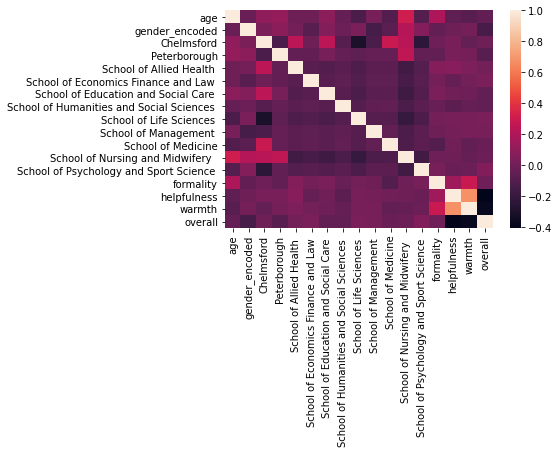

In [479]:
sns.heatmap(assoc_df.corr())

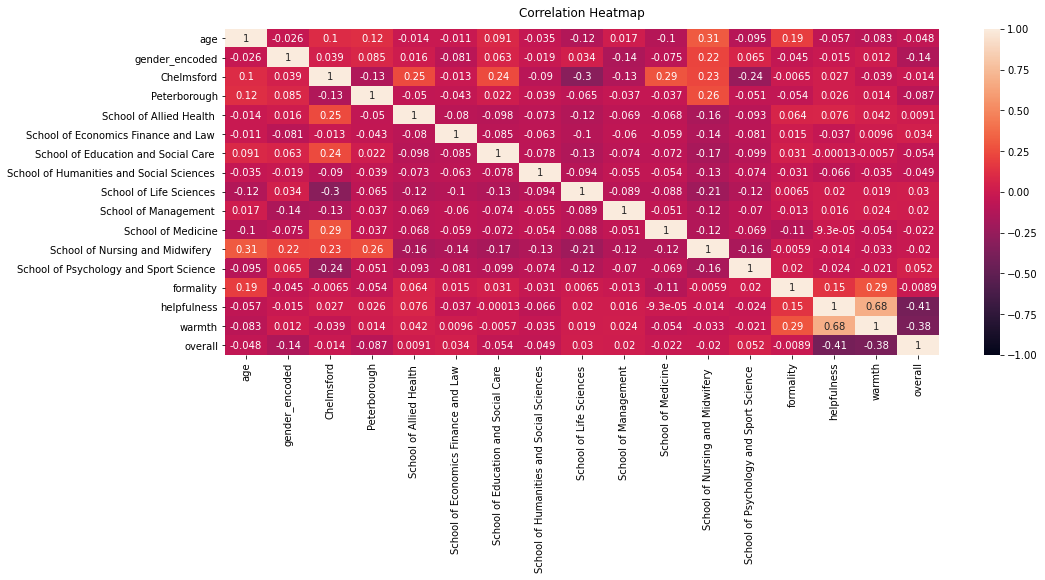

In [480]:
plt.figure(figsize=(16, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, 
#and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(assoc_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [481]:
#find nulls in final data frame
assoc_df.isnull().sum(axis = 0)

age                                          0
gender_encoded                               7
Chelmsford                                   0
Peterborough                                 0
School of Allied Health                      0
School of Economics Finance and Law          0
School of Education and Social Care          0
School of Humanities and Social Sciences     0
School of Life Sciences                      0
School of Management                         0
School of Medicine                           0
School of Nursing and Midwifery              0
School of Psychology and Sport Science       0
formality                                    0
helpfulness                                  0
warmth                                       0
overall                                      7
dtype: int64

In [482]:
assoc_df = assoc_df.dropna(subset=['overall'])

In [483]:
#check for nulls now, YAY
assoc_df.isnull().sum(axis = 0)

age                                          0
gender_encoded                               0
Chelmsford                                   0
Peterborough                                 0
School of Allied Health                      0
School of Economics Finance and Law          0
School of Education and Social Care          0
School of Humanities and Social Sciences     0
School of Life Sciences                      0
School of Management                         0
School of Medicine                           0
School of Nursing and Midwifery              0
School of Psychology and Sport Science       0
formality                                    0
helpfulness                                  0
warmth                                       0
overall                                      0
dtype: int64

In [484]:
#apply mulpiple linear regression
X = assoc_df[['age', 'gender_encoded', 'Chelmsford', 'Peterborough', 
                        'School of Allied Health ', 
                'School of Economics Finance and Law ', 'School of Education and Social Care ',
                'School of Humanities and Social Sciences ','School of Life Sciences ','School of Management ',
                'School of Medicine','School of Nursing and Midwifery  ','School of Psychology and Sport Science ',
                'formality','helpfulness','warmth']]

y = assoc_df['overall']

In [485]:
X

,age,gender_encoded,Chelmsford,Peterborough,School of Allied Health,School of Economics Finance and Law,School of Education and Social Care,School of Humanities and Social Sciences,School of Life Sciences,School of Management,School of Medicine,School of Nursing and Midwifery,School of Psychology and Sport Science,formality,helpfulness,warmth
0,22,1.0,0,0,0,0,0,0,0,1,0,0,0,2,3,3
1,21,0.0,1,0,0,0,0,0,0,1,0,0,0,2,1,2
2,21,1.0,0,0,0,0,0,0,0,0,0,0,0,1,3,3
3,21,1.0,0,1,0,0,1,0,0,0,0,0,0,1,3,3
4,30,1.0,1,0,0,0,0,0,0,0,0,1,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,22,1.0,1,0,0,0,1,0,0,0,0,0,0,2,2,3
577,21,1.0,0,0,0,0,0,1,0,0,0,0,0,2,1,1
578,27,1.0,0,0,0,0,0,0,0,0,0,1,0,2,3,3
579,23,1.0,1,0,1,0,0,0,0,0,0,0,0,2,3,3


In [486]:
y

0      4.0
1      4.0
2      1.0
3      2.0
4      2.0
      ... 
576    3.0
577    4.0
578    1.0
579    2.0
580    3.0
Name: overall, Length: 562, dtype: float64

In [487]:
X.isnull().sum(axis = 0)


age                                          0
gender_encoded                               0
Chelmsford                                   0
Peterborough                                 0
School of Allied Health                      0
School of Economics Finance and Law          0
School of Education and Social Care          0
School of Humanities and Social Sciences     0
School of Life Sciences                      0
School of Management                         0
School of Medicine                           0
School of Nursing and Midwifery              0
School of Psychology and Sport Science       0
formality                                    0
helpfulness                                  0
warmth                                       0
dtype: int64

In [488]:
y.isnull().sum(axis = 0)

0

In [489]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

regr = linear_model.LinearRegression()
regr.fit(X, y)



print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 4.58525165940625
Coefficients: 
 [-0.01355425 -0.34713342  0.01612403 -0.30364616  0.16678922  0.10861382
 -0.03130741 -0.25009724  0.14470555  0.11758596 -0.14575528  0.16573625
  0.18861813  0.17082231 -0.32699745 -0.30803028]


In [490]:
coeff = (pd.DataFrame({'Coefficients':regr.coef_, 'category':X.columns})
.sort_values(by = 'Coefficients', ascending = False)
.reset_index())

coeff

,index,Coefficients,category
0,12,0.188618,School of Psychology and Sport Science
1,13,0.170822,formality
2,4,0.166789,School of Allied Health
3,11,0.165736,School of Nursing and Midwifery
4,8,0.144706,School of Life Sciences
5,9,0.117586,School of Management
6,5,0.108614,School of Economics Finance and Law
7,2,0.016124,Chelmsford
8,0,-0.013554,age
9,6,-0.031307,School of Education and Social Care


In [491]:
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

#newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X.reset_index(drop=True)))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - len(newX.columns)))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,7)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]

In [492]:
myDF3 = myDF3.sort_values(["Coefficients"], ascending=False)

In [493]:
coeff_df = myDF3.iloc[1: , :]
coeff_df = coeff_df.reset_index()
coeff_df

,index,Coefficients,Standard Errors,t values,Probabilities
0,13,0.1886,0.146,1.296,1.954974e-01
1,14,0.1708,0.067,2.535,1.151010e-02
2,5,0.1668,0.157,1.061,2.890163e-01
3,12,0.1657,0.132,1.254,2.104777e-01
4,9,0.1447,0.128,1.133,2.579048e-01
5,10,0.1176,0.175,0.672,5.017378e-01
6,6,0.1086,0.160,0.678,4.982895e-01
7,3,0.0161,0.096,0.168,8.666977e-01
8,1,-0.0136,0.005,-2.756,6.043900e-03
9,7,-0.0313,0.154,-0.203,8.392044e-01


In [494]:
regression_df = coeff_df.join(coeff, lsuffix='', rsuffix='_other')
regression_df

,index,Coefficients,Standard Errors,t values,Probabilities,index_other,Coefficients_other,category
0,13,0.1886,0.146,1.296,1.954974e-01,12,0.188618,School of Psychology and Sport Science
1,14,0.1708,0.067,2.535,1.151010e-02,13,0.170822,formality
2,5,0.1668,0.157,1.061,2.890163e-01,4,0.166789,School of Allied Health
3,12,0.1657,0.132,1.254,2.104777e-01,11,0.165736,School of Nursing and Midwifery
4,9,0.1447,0.128,1.133,2.579048e-01,8,0.144706,School of Life Sciences
5,10,0.1176,0.175,0.672,5.017378e-01,9,0.117586,School of Management
6,6,0.1086,0.160,0.678,4.982895e-01,5,0.108614,School of Economics Finance and Law
7,3,0.0161,0.096,0.168,8.666977e-01,2,0.016124,Chelmsford
8,1,-0.0136,0.005,-2.756,6.043900e-03,0,-0.013554,age
9,7,-0.0313,0.154,-0.203,8.392044e-01,6,-0.031307,School of Education and Social Care


In [495]:
regression_df = regression_df.drop(['index','Coefficients_other','index_other'], axis = 1)


In [496]:

regression_df['upper'] = regression_df['Coefficients'] + 1.96*regression_df['Standard Errors']
regression_df['lower'] = regression_df['Coefficients'] - 1.96*regression_df['Standard Errors']
regression_df

,Coefficients,Standard Errors,t values,Probabilities,category,upper,lower
0,0.1886,0.146,1.296,1.954974e-01,School of Psychology and Sport Science,0.47476,-0.09756
1,0.1708,0.067,2.535,1.151010e-02,formality,0.30212,0.03948
2,0.1668,0.157,1.061,2.890163e-01,School of Allied Health,0.47452,-0.14092
3,0.1657,0.132,1.254,2.104777e-01,School of Nursing and Midwifery,0.42442,-0.09302
4,0.1447,0.128,1.133,2.579048e-01,School of Life Sciences,0.39558,-0.10618
5,0.1176,0.175,0.672,5.017378e-01,School of Management,0.46060,-0.22540
6,0.1086,0.160,0.678,4.982895e-01,School of Economics Finance and Law,0.42220,-0.20500
7,0.0161,0.096,0.168,8.666977e-01,Chelmsford,0.20426,-0.17206
8,-0.0136,0.005,-2.756,6.043900e-03,age,-0.00380,-0.02340
9,-0.0313,0.154,-0.203,8.392044e-01,School of Education and Social Care,0.27054,-0.33314


In [497]:
regression_df = regression_df.set_index('category')

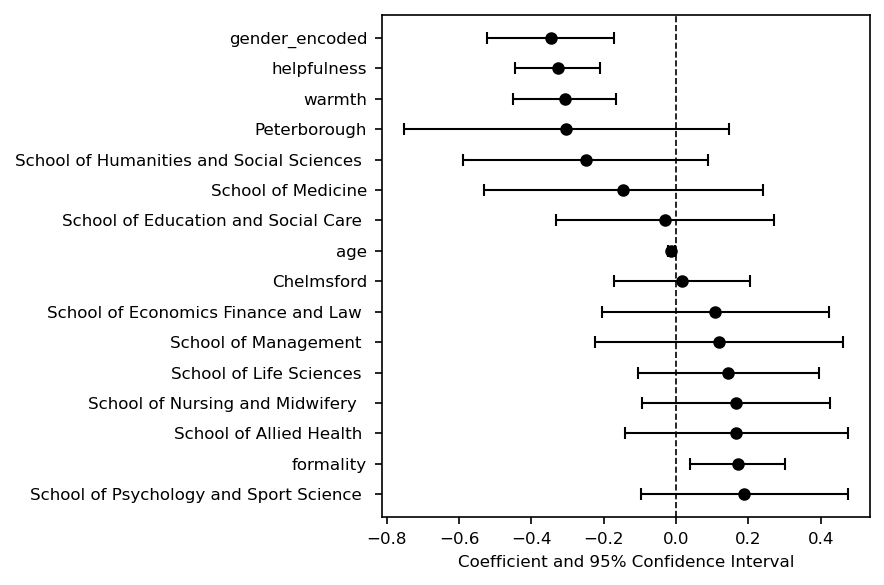

In [498]:
plt.figure(figsize=(6, 4), dpi=150)
ci = [regression_df.iloc[::]['Coefficients'] - regression_df.iloc[::]['lower'].values, regression_df.iloc[::]['upper'].values - regression_df.iloc[::]['Coefficients']]
plt.errorbar(x=regression_df.iloc[::]['Coefficients'], y=regression_df.iloc[::].index.values, xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")
plt.axvline(x=0, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Coefficient and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
# plt.savefig('raw_forest_plot.png')
plt.show()


# powerbi

In [499]:
powerbi_demo = labeled_df1[['year', 'campus', 'department','course','gender','age','ethnicity','nationality',
 'household_income','disab','school','formality','helpfulness','warmth','overall']]

In [500]:
powerbi_demo['household_income'] = powerbi_demo['household_income'].fillna('unreported')

<ipython-input-500-b8945acc3a01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [501]:
powerbi_demo

,year,campus,department,course,gender,age,ethnicity,nationality,household_income,disab,school,formality,helpfulness,warmth,overall
0,2021-2022,Cambridge,BL,BSc (Hons) Business with Events Management,Female,22,Mixed - White & Black African,Portuguese,Low,No,School of Management,2,3,3,4.0
1,2021-2022,Chelmsford,BL,BSc (Hons) Business Management and Leadership,Male,21,Other Asian background,Nepalese,unreported,No,School of Management,2,1,2,4.0
2,2021-2022,Cambridge,AHSS,BA (Hons) Performing Arts,Female,21,White,UK National,Mid,No,Cambridge School of the Creative Industries,1,3,3,1.0
3,2021-2022,Peterborough,HEMS,BA (Hons) Primary Education Studies,Female,21,White,UK National,Low,Yes,School of Education and Social Care,1,3,3,2.0
4,2021-2022,Chelmsford,HEMS,BSc (Hons) Nursing (Child),Female,30,White,UK National,Low,Yes,School of Nursing and Midwifery,1,3,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,2021-2022,Chelmsford,HEMS,BA (Hons) Primary Education Studies,Female,22,White,UK National,unreported,No,School of Education and Social Care,2,2,3,3.0
577,2021-2022,Cambridge,AHSS,BA (Hons) Sociology,Female,21,Asian or Asian British - Bangladeshi,UK National,unreported,No,School of Humanities and Social Sciences,2,1,1,4.0
578,2021-2022,Cambridge,HEMS,BSc (Hons) Midwifery,Female,27,White,UK National,Low,No,School of Nursing and Midwifery,2,3,3,1.0
579,2021-2022,Chelmsford,HEMS,BSc (Hons) Paramedic Science,Female,23,White,UK National,Mid,No,School of Allied Health,2,3,3,2.0


In [502]:
#reduce words in school column for ease of viewing in powerbi
powerbi_demo['school'] = powerbi_demo['school'].str.replace('School of ', '')
powerbi_demo['school'] = powerbi_demo['school'].str.replace('Cambridge the ', '')
powerbi_demo['school'] = powerbi_demo['school'].str.replace('and', '&')

<ipython-input-502-7d7189df9c85>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-502-7d7189df9c85>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-502-7d7189df9c85>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [503]:
powerbi_demo.head()

,year,campus,department,course,gender,age,ethnicity,nationality,household_income,disab,school,formality,helpfulness,warmth,overall
0,2021-2022,Cambridge,BL,BSc (Hons) Business with Events Management,Female,22,Mixed - White & Black African,Portuguese,Low,No,Management,2,3,3,4.0
1,2021-2022,Chelmsford,BL,BSc (Hons) Business Management and Leadership,Male,21,Other Asian background,Nepalese,unreported,No,Management,2,1,2,4.0
2,2021-2022,Cambridge,AHSS,BA (Hons) Performing Arts,Female,21,White,UK National,Mid,No,Creative Industries,1,3,3,1.0
3,2021-2022,Peterborough,HEMS,BA (Hons) Primary Education Studies,Female,21,White,UK National,Low,Yes,Education & Social Care,1,3,3,2.0
4,2021-2022,Chelmsford,HEMS,BSc (Hons) Nursing (Child),Female,30,White,UK National,Low,Yes,Nursing & Midwifery,1,3,3,2.0


In [504]:
powerbi_demo.to_csv('powerbi_demo.csv')

In [505]:
powerbi_demo.to_csv('/Users/symphony/Downloads/powerbi_demo.csv')